In [1]:
import pandas as pd

In [2]:
SYMBOL = 'INFY.BO'
INTERVAL = '1min'
API_KEY = 'VJOJOA8WIN0QEPCF'

In [3]:
url = f'https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol={SYMBOL}&interval={INTERVAL}&apikey={API_KEY}&datatype=csv'

In [4]:
df = pd.read_csv(url)

In [5]:
df.head()

,timestamp,open,high,low,close,volume
0,2020-06-12 05:59:00,690.90,692.10,690.45,692.10,532
1,2020-06-12 05:58:00,690.20,690.50,690.20,690.45,1317
2,2020-06-12 05:57:00,690.45,690.45,690.05,690.15,79
3,2020-06-12 05:56:00,690.05,690.45,690.05,690.45,1350
4,2020-06-12 05:55:00,690.35,690.50,690.00,690.40,457


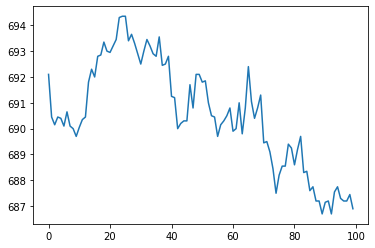

In [6]:
df['close'].plot()

In [21]:
df['tomo_gain'] = df['close'].shift(-1) - df['close']
df['yday_gain'] = df['tomo_gain'].shift(1)
df = df.dropna()
df = df.reset_index(drop=True)
df.head()

,timestamp,open,high,low,close,volume,pct,tomo_gain,yday_gain
0,2020-06-12 05:58:00,690.20,690.50,690.20,690.45,1317,-0.002384,-0.30,-1.65
1,2020-06-12 05:57:00,690.45,690.45,690.05,690.15,79,-0.000434,0.30,-0.30
2,2020-06-12 05:56:00,690.05,690.45,690.05,690.45,1350,0.000435,-0.05,0.30
3,2020-06-12 05:55:00,690.35,690.50,690.00,690.40,457,-0.000072,-0.30,-0.05
4,2020-06-12 05:54:00,690.40,690.50,690.00,690.10,519,-0.000435,0.55,-0.30


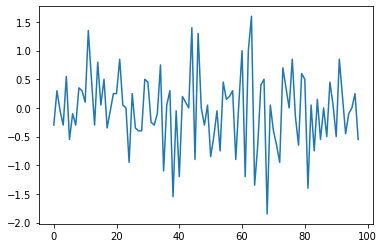

In [22]:
df['tomo_gain'].plot()

In [7]:
df['pct'] = df['close'].pct_change()

In [8]:
df.describe()

,open,high,low,close,volume,pct
count,100.000000,100.000000,100.000000,100.000000,100.000000,99.000000
mean,690.541000,690.950000,690.153500,690.534500,1086.030000,-0.000076
std,2.045176,2.077768,2.012828,2.061194,1728.643653,0.000965
min,686.200000,687.100000,686.200000,686.700000,30.000000,-0.002676
25%,689.000000,689.500000,688.662500,689.237500,292.750000,-0.000617
50%,690.450000,691.000000,690.075000,690.450000,540.000000,0.000000
75%,692.362500,692.650000,691.887500,692.325000,1141.750000,0.000471
max,694.500000,694.800000,694.150000,694.350000,14440.000000,0.002316


In [9]:
ctr = 0 
ctrcapture = 0
mins = 100
for i in df['pct'].values:
    if i < mins:
        mins = i
        ctrcapture = ctr
    ctr += 1
print(mins, ctrcapture)

-0.002676117459858074 70


In [10]:
print(df['pct'].values)

[            nan -2.38404855e-03 -4.34499240e-04  4.34688111e-04
 -7.24165399e-05 -4.34530707e-04  7.96985944e-04 -7.96351263e-04
 -1.44906535e-04 -4.34782609e-04  5.07467015e-04  4.34751105e-04
  1.44854060e-04  1.95524658e-03  7.22752241e-04 -4.33338148e-04
  1.15606936e-03  7.21709007e-05  7.21656924e-04 -5.04795558e-04
 -7.21500722e-05  3.60776391e-04  3.60646278e-04  1.22575528e-03
  7.20149791e-05  0.00000000e+00 -1.36818607e-03  3.60542256e-04
 -5.04577236e-04 -5.76950815e-04 -5.77283879e-04  7.22021661e-04
  6.49350649e-04 -3.60516259e-04 -4.32775534e-04 -1.44320970e-04
  1.08256351e-03 -1.58604282e-03  7.22073796e-05  4.33212996e-04
 -2.23729792e-03 -7.23327306e-05 -1.73611111e-03  2.89855072e-04
  1.44885540e-04  0.00000000e+00  2.02810372e-03 -1.30114211e-03
  1.88187609e-03  0.00000000e+00 -4.33463372e-04  7.22752241e-05
 -1.22859001e-03 -7.23589001e-04 -7.24112962e-05 -1.08624810e-03
  6.52457590e-04  2.17344056e-04  2.89729103e-04  4.34467777e-04
 -1.30283729e-03  1.44948

In [11]:
actions = []
ctrs = []

In [12]:
prev = []
ctr = 0
for i in df['pct'].values:
    if len(prev) >=10:
        sums = 0
        for j in prev:
            sums = sums + j
        if sums < -0.000318:
            ctrs.append(ctr)
            actions.append(1)
        elif sums > 0.00041:
            ctrs.append(ctr)
            actions.append(0)
        else:
            ctrs.append(ctr)
            actions.append(3)
        prev.pop(0)
    ctr +=1

    prev.append(i)

In [13]:
import plotly.express as px

In [15]:
import psutil
fig = px.line(df, y='close')
img_bytes = fig.to_image(format='png')

In [16]:
def calcprofit():
    port = 1000
    init = 2000
    if actions[-1] == 1 and actions[-2]==1 and actions[-3]==1:
        pass

In [17]:
import os

if not os.path.exists("images"):
    os.mkdir("images")

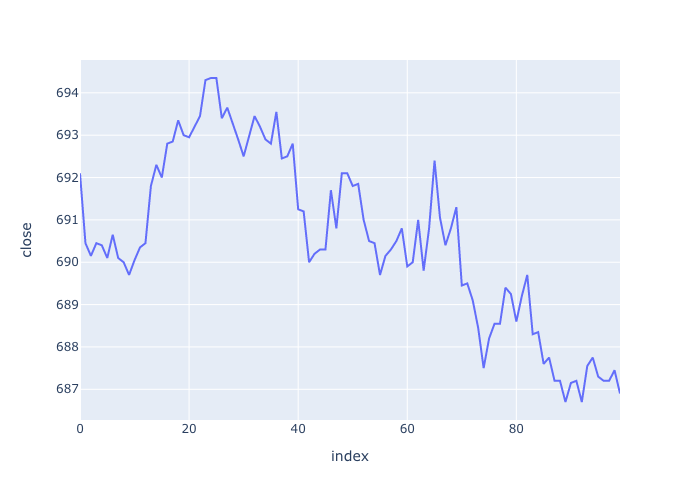

In [18]:
from IPython.display import Image
Image(img_bytes)

In [20]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
